# Maximum Likehood Estimation (MLE)

This page introduces a basic method in statistics: Maximum Likehood Estimation (ELM). To understand what ELM is, we first need to figure out what is likehood. Statistics, regardless of frequentist or baysian, is all about fitting data to our defined model, which defines the likehood function. The goal of fitting is to find out the parameters of our model which fit our data best, and mathematically speaking, best fitting is defined as maximum likehood. 
For example, if we have a sequence of numbers X (like heights of a population), it would be reasonable to assume that this sequence follows normal distribution. The the likehood would be defined by the probability densitiy function (pdf) of the normal distibution. The the question is to find out parameters, in this case mean and standard deviation of normal distribution, that fit our data best. 
In the following section, we will explore how to find out the best fitting parameters for our model with MLE. For demostration purpose, we will use a simple problem defined in last paragraph.

## Step0: Enviroment Initializing

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy import stats
from statsmodels.base.model import GenericLikelihoodModel

## Step1: Load data

Here we will use dataset availiable at: http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv
After downloading, we will import to python:

In [2]:
DataSet = pd.read_csv('./NHIS 2007 data.csv')
DataSet.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


This dataset contains 9 variables concerning a person's health infromation. In this example, we will explore weight only for demonstration purpose

In [3]:
Weight = DataSet['weight']
Weight.head()

0    260
1    185
2    170
3    175
4    168
Name: weight, dtype: int64

Let's see how weight is distribution across this population (4784 people)

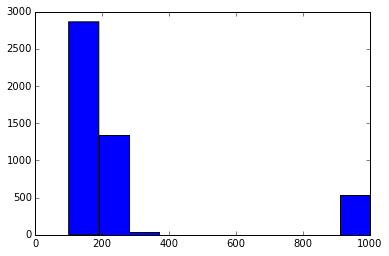

In [4]:
hist_Weight = plt.hist(Weight)

As you can see, there is a group of people who have weights more that 800 pounds. According to our common sense this is impossible, so we think that these data points are outliers and should be ruled out.

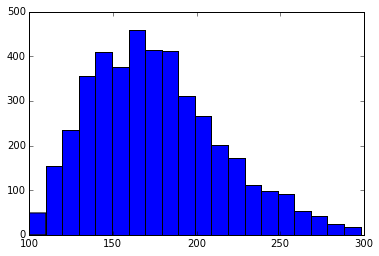

In [5]:
Weight = Weight.drop(Weight[Weight>800].index);
hist_Weight = plt.hist(Weight,20);

Now the data looks reasonable and we can fit a normal distribution to this dataset.

## Step2: Data Fitting

Here we will use GenericLikelihoodModel from statsmodels library to perform MLE. To do so ,we define a class that inherit from GenericLikelihoodModel: MLE_normal.

In [6]:
class MLE_normal(GenericLikelihoodModel):
    def _init_(self, endog,exog=None,**kwds):
        if exog is None:
            exog = np.zeros_like(endog)
        super(MLE_normal,self)._init_(endog,exog,**kwds)
    
    def nloglikeobs(self,param):
        mu = param[0];
        std = param[1];
        ll = -np.log(stats.norm.pdf(self.endog,mu,std))
        return ll
    
    def fit(self,start_params=None,maxiter=10000,maxfun=5000,**kwds):
        if start_params is None:
            mu_start = np.mean(self.endog);
            std_start = np.std(self.endog);
            start_params = np.array([mu_start,std_start])
        return super(MLE_normal,self).fit(start_params=start_params,
                                         maxiter = maxiter,maxfun=maxfun,**kwds)

After defining the class, we are ready to fit the model on our data.

## Step3:Model Fitting

In [7]:
Model = MLE_normal(Weight)
Results = Model.fit()

Optimization terminated successfully.
         Current function value: 5.077668
         Iterations: 33
         Function evaluations: 67


In [8]:
Params = Results.params #Extract the parameters [mu,std]

Now let's check the fitting results by superimpose the original distribution with the fitting curve

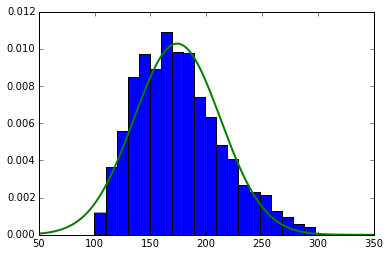

In [9]:
x = np.linspace(50,350,1000)
Weight_hist = plt.hist(Weight,20,normed=True)
h = plt.plot(x,stats.norm.pdf(x,Params[0],Params[1]),lw=2)
plt.show()

As shown in this figure, this is a pretty reasonable fitting.

## Summary

In this example, we demonstrated how to use MLE to perform fitting with the weight example data. This process involved 3 steps: 1. Visiualize data to find a reseasonal model and rule out outliers. 2. Define a class inherited from GenericLikelihoododel by overwriting _init_ function, nliglikeobs function, and fit function to our customized model. 3. Do fitting and inspect the result 